# Multi-Layer Perceptron

Se implementa una Red Neuronal Multicapa para clasificar digitos manuscritos de el popular conjunto de datos Mixed National Institute of Standards and Technology (MNIST). Esta muestra de entrenamiento fue construida por Yann LeCun y otros para servir como *benchmark* para los algoritmos de aprendizaje automático.

## Obtener y prepara la conjunto de datos MNIST

[MNIST]( http://yann.lecun.com/exdb/mnist/)

In [11]:
import os
import struct
import numpy as np

In [14]:
def load_mnist(path, kind='train'):
    """Leer los datos de MNIST de la ruta 'path'"""
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
    return images, labels
    

In [15]:
X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


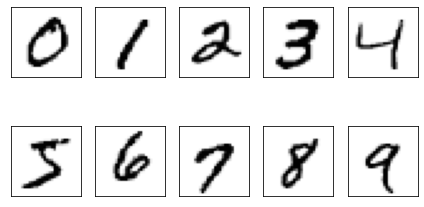

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

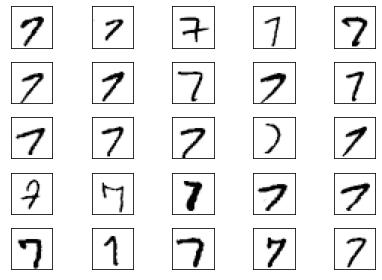

In [17]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [18]:
np.savez_compressed('mnist_scaled.npz', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [19]:
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [20]:
#X_train = mnist['X_train']
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

In [21]:
from neuralnet import NeuralNetMLP

# Estructura de la clase NeuralNetMLP

```python
import numpy as np
import sys

class NeuralNetMLP(object):
    """ Feedforward neural network / Multi-layer perceptron
classifier.
    Parameters
    ------------
    n_hidden : int (default: 30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization.
        No regularization if l2=0. (default)
    epochs : int (default: 100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        Shuffles training data every epoch
        if True to prevent circles.
    minibatch_size : int (default: 1)
        Number of training examples per minibatch.
    seed : int (default: None)
        Random seed for initializing weights and shuffling.
    Attributes
    -----------
    eval_ : dict
        Dictionary collecting the cost, training accuracy,
        and validation accuracy for each epoch during training.
    """
    def __init__(self, n_hidden=30,
                l2=0., epochs=100, eta=0.001,
                shuffle=True, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation
        Parameters
        ------------
        y : array, shape = [n_examples]
            Target values.
        Returns
        -----------
        onehot : array, shape = (n_examples, n_labels)
        """
        pass

    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        pass

    def _forward(self, X):
        """Compute forward propagation step"""
        pass

    def _compute_cost(self, y_enc, output):
        """Compute cost function.
        Parameters
        ----------
        y_enc : array, shape = (n_examples, n_labels)
            one-hot encoded class labels.
        output : array, shape = [n_examples, n_output_units]
            Activation of the output layer (forward propagation)
        Returns
        ---------
        cost : float
            Regularized cost
        """
        pass

    def predict(self, X):
        """Predict class labels
        Parameters
        -----------
        X : array, shape = [n_examples, n_features]
            Input layer with original features.
        Returns:
        ----------
        y_pred : array, shape = [n_examples]
            Predicted class labels.
        """
        pass

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights from training data.
        Parameters
        -----------
        X_train : array, shape = [n_examples, n_features]
            Input layer with original features.
        y_train : array, shape = [n_examples]
            Target class labels.
        X_valid : array, shape = [n_examples, n_features]
            Sample features for validation during training
        y_valid : array, shape = [n_examples]
            Sample labels for validation during training
        Returns:
        ----------
        self
        """
        pass
```


In [22]:
nn = NeuralNetMLP(n_hidden=100, l2=0.01, epochs=200, eta=0.0005, minibatch_size=100, shuffle=True, seed=1)

In [29]:
nn.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:])

200/200 | Cost: 5105.80 | Train/Valid Acc.: 99.29%/98.04%  

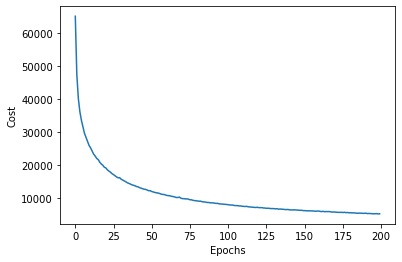

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.show()

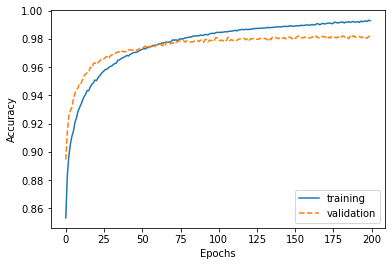

In [26]:
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label='training')
plt.plot(range(nn.epochs), nn.eval_['valid_acc'], label='validation', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

In [27]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])
print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 97.58%


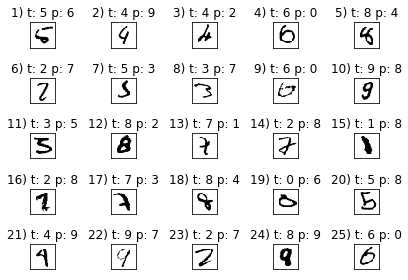

In [28]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()